In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
import matplotlib
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tracking2018=pd.read_csv('tracking2018.csv.zip')
players=pd.read_csv('players.csv')

In [3]:
def printCols(data):
    n=0
    for i in data.columns:
        print(i,n)
        n=n+1

In [4]:
df = pd.read_csv('punt_df2.csv')
df = df.drop(columns=['Unnamed: 0','kickoffReturnFormation','returnDirectionIntended','kickDirectionActual.1','down',
                                 'penaltyCodes','penaltyYards'])

In [5]:
df = df.drop(columns=["gameId",'playId','homeTeamAbbr','visitorTeamAbbr','hangTime','operationTime','possessionTeam','kickLength','kickContactType','kickDirectionIntended','kickDirectionActual','playResult','yardlineSide'])


In [6]:
df['gameClock']=pd.to_datetime(df['gameClock']).astype('int64')

In [7]:
printCols(df)

snapDetail 0
kickType 1
quarter 2
yardsToGo 3
specialTeamsResult 4
yardlineNumber 5
gameClock 6
preSnapHomeScore 7
preSnapVisitorScore 8
kickReturnYardage 9
absoluteYardlineNumber 10
nflId 11
playDirection 12
puntPlay 13
P1_t0_x 14
P1_t0_y 15
P1_t0_s 16
P1_t0_a 17
P1_t0_dis 18
P1_t0_o 19
P1_t0_dir 20
P1_t5_x 21
P1_t5_y 22
P1_t5_s 23
P1_t5_a 24
P1_t5_dis 25
P1_t5_o 26
P1_t5_dir 27
P1_t10_x 28
P1_t10_y 29
P1_t10_s 30
P1_t10_a 31
P1_t10_dis 32
P1_t10_o 33
P1_t10_dir 34
P1_t15_x 35
P1_t15_y 36
P1_t15_s 37
P1_t15_a 38
P1_t15_dis 39
P1_t15_o 40
P1_t15_dir 41
P1_t20_x 42
P1_t20_y 43
P1_t20_s 44
P1_t20_a 45
P1_t20_dis 46
P1_t20_o 47
P1_t20_dir 48
P1_t25_x 49
P1_t25_y 50
P1_t25_s 51
P1_t25_a 52
P1_t25_dis 53
P1_t25_o 54
P1_t25_dir 55
P1_t30_x 56
P1_t30_y 57
P1_t30_s 58
P1_t30_a 59
P1_t30_dis 60
P1_t30_o 61
P1_t30_dir 62
P2_t0_x 63
P2_t0_y 64
P2_t0_s 65
P2_t0_a 66
P2_t0_dis 67
P2_t0_o 68
P2_t0_dir 69
P2_t5_x 70
P2_t5_y 71
P2_t5_s 72
P2_t5_a 73
P2_t5_dis 74
P2_t5_o 75
P2_t5_dir 76
P2_t10_x 77
P2_

P15_t10_x 714
P15_t10_y 715
P15_t10_s 716
P15_t10_a 717
P15_t10_dis 718
P15_t10_o 719
P15_t10_dir 720
P15_t15_x 721
P15_t15_y 722
P15_t15_s 723
P15_t15_a 724
P15_t15_dis 725
P15_t15_o 726
P15_t15_dir 727
P15_t20_x 728
P15_t20_y 729
P15_t20_s 730
P15_t20_a 731
P15_t20_dis 732
P15_t20_o 733
P15_t20_dir 734
P15_t25_x 735
P15_t25_y 736
P15_t25_s 737
P15_t25_a 738
P15_t25_dis 739
P15_t25_o 740
P15_t25_dir 741
P15_t30_x 742
P15_t30_y 743
P15_t30_s 744
P15_t30_a 745
P15_t30_dis 746
P15_t30_o 747
P15_t30_dir 748
P16_t0_x 749
P16_t0_y 750
P16_t0_s 751
P16_t0_a 752
P16_t0_dis 753
P16_t0_o 754
P16_t0_dir 755
P16_t5_x 756
P16_t5_y 757
P16_t5_s 758
P16_t5_a 759
P16_t5_dis 760
P16_t5_o 761
P16_t5_dir 762
P16_t10_x 763
P16_t10_y 764
P16_t10_s 765
P16_t10_a 766
P16_t10_dis 767
P16_t10_o 768
P16_t10_dir 769
P16_t15_x 770
P16_t15_y 771
P16_t15_s 772
P16_t15_a 773
P16_t15_dis 774
P16_t15_o 775
P16_t15_dir 776
P16_t20_x 777
P16_t20_y 778
P16_t20_s 779
P16_t20_a 780
P16_t20_dis 781
P16_t20_o 782
P16_t20_di

In [8]:
dfsnap =pd.get_dummies(df["snapDetail"],prefix="snap")
dfkt =pd.get_dummies(df["kickType"],prefix="kicktype")
dfqu=pd.get_dummies(df["quarter"], prefix="quarter")
dfstr=pd.get_dummies(df['specialTeamsResult'],prefix="result")
dfpd=pd.get_dummies(df['playDirection'],prefix="playDirection")

In [9]:
df= pd.concat([dfsnap,dfkt,dfqu,dfstr,dfpd,df], axis=1 ) #dropped kickcontacttpe bc dataleakage
df= df.drop(columns=['snapDetail', 'kickType','quarter','specialTeamsResult','playDirection'])
df

,snap_<,snap_>,snap_H,snap_L,snap_OK,kicktype_A,kicktype_N,kicktype_R,quarter_1,quarter_2,...,P22_t25_dis,P22_t25_o,P22_t25_dir,P22_t30_x,P22_t30_y,P22_t30_s,P22_t30_a,P22_t30_dis,P22_t30_o,P22_t30_dir
0,0,0,0,0,1,0,1,0,1,0,...,0.29,234.56,239.04,13.87,32.05,1.26,5.02,0.16,232.79,208.81
1,0,0,0,0,1,0,1,0,1,0,...,0.36,261.29,298.83,41.28,32.59,3.61,2.63,0.37,271.19,321.46
2,0,0,0,0,1,0,1,0,0,1,...,0.39,137.01,261.71,14.11,27.14,3.19,2.72,0.32,142.72,244.21
3,0,0,0,0,1,0,1,0,0,1,...,0.30,81.98,71.33,83.63,30.32,1.51,1.80,0.16,63.54,75.25
4,0,0,0,0,1,0,1,0,0,1,...,0.17,87.27,165.12,33.93,20.29,2.85,3.29,0.27,91.30,109.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5361,0,0,1,0,0,0,1,0,0,1,...,0.73,239.92,264.21,81.01,42.26,8.02,2.08,0.80,230.31,255.97
5362,0,0,0,0,1,0,1,0,0,1,...,0.51,196.28,153.07,36.96,40.09,7.03,2.89,0.69,153.27,143.08
5363,0,0,0,0,1,0,1,0,0,0,...,0.62,184.74,159.87,39.97,37.73,7.70,2.22,0.76,161.90,150.72
5364,0,0,0,0,1,0,1,0,0,0,...,0.51,198.05,152.45,39.46,39.41,6.62,1.73,0.65,176.24,146.87


In [10]:
df.drop(columns=['result_Downed', 'result_Muffed', 
                  'result_Non-Special Teams Result', 'result_Fair Catch', 'result_Touchback'],
                 inplace=True)

In [11]:
printCols(df)

snap_< 0
snap_> 1
snap_H 2
snap_L 3
snap_OK 4
kicktype_A 5
kicktype_N 6
kicktype_R 7
quarter_1 8
quarter_2 9
quarter_3 10
quarter_4 11
quarter_5 12
result_Return 13
playDirection_left 14
playDirection_right 15
yardsToGo 16
yardlineNumber 17
gameClock 18
preSnapHomeScore 19
preSnapVisitorScore 20
kickReturnYardage 21
absoluteYardlineNumber 22
nflId 23
puntPlay 24
P1_t0_x 25
P1_t0_y 26
P1_t0_s 27
P1_t0_a 28
P1_t0_dis 29
P1_t0_o 30
P1_t0_dir 31
P1_t5_x 32
P1_t5_y 33
P1_t5_s 34
P1_t5_a 35
P1_t5_dis 36
P1_t5_o 37
P1_t5_dir 38
P1_t10_x 39
P1_t10_y 40
P1_t10_s 41
P1_t10_a 42
P1_t10_dis 43
P1_t10_o 44
P1_t10_dir 45
P1_t15_x 46
P1_t15_y 47
P1_t15_s 48
P1_t15_a 49
P1_t15_dis 50
P1_t15_o 51
P1_t15_dir 52
P1_t20_x 53
P1_t20_y 54
P1_t20_s 55
P1_t20_a 56
P1_t20_dis 57
P1_t20_o 58
P1_t20_dir 59
P1_t25_x 60
P1_t25_y 61
P1_t25_s 62
P1_t25_a 63
P1_t25_dis 64
P1_t25_o 65
P1_t25_dir 66
P1_t30_x 67
P1_t30_y 68
P1_t30_s 69
P1_t30_a 70
P1_t30_dis 71
P1_t30_o 72
P1_t30_dir 73
P2_t0_x 74
P2_t0_y 75
P2_t0_s 76


P21_t0_a 1008
P21_t0_dis 1009
P21_t0_o 1010
P21_t0_dir 1011
P21_t5_x 1012
P21_t5_y 1013
P21_t5_s 1014
P21_t5_a 1015
P21_t5_dis 1016
P21_t5_o 1017
P21_t5_dir 1018
P21_t10_x 1019
P21_t10_y 1020
P21_t10_s 1021
P21_t10_a 1022
P21_t10_dis 1023
P21_t10_o 1024
P21_t10_dir 1025
P21_t15_x 1026
P21_t15_y 1027
P21_t15_s 1028
P21_t15_a 1029
P21_t15_dis 1030
P21_t15_o 1031
P21_t15_dir 1032
P21_t20_x 1033
P21_t20_y 1034
P21_t20_s 1035
P21_t20_a 1036
P21_t20_dis 1037
P21_t20_o 1038
P21_t20_dir 1039
P21_t25_x 1040
P21_t25_y 1041
P21_t25_s 1042
P21_t25_a 1043
P21_t25_dis 1044
P21_t25_o 1045
P21_t25_dir 1046
P21_t30_x 1047
P21_t30_y 1048
P21_t30_s 1049
P21_t30_a 1050
P21_t30_dis 1051
P21_t30_o 1052
P21_t30_dir 1053
P22_t0_x 1054
P22_t0_y 1055
P22_t0_s 1056
P22_t0_a 1057
P22_t0_dis 1058
P22_t0_o 1059
P22_t0_dir 1060
P22_t5_x 1061
P22_t5_y 1062
P22_t5_s 1063
P22_t5_a 1064
P22_t5_dis 1065
P22_t5_o 1066
P22_t5_dir 1067
P22_t10_x 1068
P22_t10_y 1069
P22_t10_s 1070
P22_t10_a 1071
P22_t10_dis 1072
P22_t10_o 10

In [12]:
df = df[[c for c in df if c not in ['result_Return']] 
       + ['result_Return']]
printCols(df)

snap_< 0
snap_> 1
snap_H 2
snap_L 3
snap_OK 4
kicktype_A 5
kicktype_N 6
kicktype_R 7
quarter_1 8
quarter_2 9
quarter_3 10
quarter_4 11
quarter_5 12
playDirection_left 13
playDirection_right 14
yardsToGo 15
yardlineNumber 16
gameClock 17
preSnapHomeScore 18
preSnapVisitorScore 19
kickReturnYardage 20
absoluteYardlineNumber 21
nflId 22
puntPlay 23
P1_t0_x 24
P1_t0_y 25
P1_t0_s 26
P1_t0_a 27
P1_t0_dis 28
P1_t0_o 29
P1_t0_dir 30
P1_t5_x 31
P1_t5_y 32
P1_t5_s 33
P1_t5_a 34
P1_t5_dis 35
P1_t5_o 36
P1_t5_dir 37
P1_t10_x 38
P1_t10_y 39
P1_t10_s 40
P1_t10_a 41
P1_t10_dis 42
P1_t10_o 43
P1_t10_dir 44
P1_t15_x 45
P1_t15_y 46
P1_t15_s 47
P1_t15_a 48
P1_t15_dis 49
P1_t15_o 50
P1_t15_dir 51
P1_t20_x 52
P1_t20_y 53
P1_t20_s 54
P1_t20_a 55
P1_t20_dis 56
P1_t20_o 57
P1_t20_dir 58
P1_t25_x 59
P1_t25_y 60
P1_t25_s 61
P1_t25_a 62
P1_t25_dis 63
P1_t25_o 64
P1_t25_dir 65
P1_t30_x 66
P1_t30_y 67
P1_t30_s 68
P1_t30_a 69
P1_t30_dis 70
P1_t30_o 71
P1_t30_dir 72
P2_t0_x 73
P2_t0_y 74
P2_t0_s 75
P2_t0_a 76
P2_t0_

P17_t0_y 809
P17_t0_s 810
P17_t0_a 811
P17_t0_dis 812
P17_t0_o 813
P17_t0_dir 814
P17_t5_x 815
P17_t5_y 816
P17_t5_s 817
P17_t5_a 818
P17_t5_dis 819
P17_t5_o 820
P17_t5_dir 821
P17_t10_x 822
P17_t10_y 823
P17_t10_s 824
P17_t10_a 825
P17_t10_dis 826
P17_t10_o 827
P17_t10_dir 828
P17_t15_x 829
P17_t15_y 830
P17_t15_s 831
P17_t15_a 832
P17_t15_dis 833
P17_t15_o 834
P17_t15_dir 835
P17_t20_x 836
P17_t20_y 837
P17_t20_s 838
P17_t20_a 839
P17_t20_dis 840
P17_t20_o 841
P17_t20_dir 842
P17_t25_x 843
P17_t25_y 844
P17_t25_s 845
P17_t25_a 846
P17_t25_dis 847
P17_t25_o 848
P17_t25_dir 849
P17_t30_x 850
P17_t30_y 851
P17_t30_s 852
P17_t30_a 853
P17_t30_dis 854
P17_t30_o 855
P17_t30_dir 856
P18_t0_x 857
P18_t0_y 858
P18_t0_s 859
P18_t0_a 860
P18_t0_dis 861
P18_t0_o 862
P18_t0_dir 863
P18_t5_x 864
P18_t5_y 865
P18_t5_s 866
P18_t5_a 867
P18_t5_dis 868
P18_t5_o 869
P18_t5_dir 870
P18_t10_x 871
P18_t10_y 872
P18_t10_s 873
P18_t10_a 874
P18_t10_dis 875
P18_t10_o 876
P18_t10_dir 877
P18_t15_x 878
P18_t15

In [13]:
returned=df.copy()
#returned=returned[returned['result_Return']==1] #only keep where return is true

In [14]:
returned = returned[[c for c in returned if c not in ['kickReturnYardage']] 
       + ['kickReturnYardage']]
returned.drop(columns=['result_Return'],
                 inplace=True)
printCols(returned)

snap_< 0
snap_> 1
snap_H 2
snap_L 3
snap_OK 4
kicktype_A 5
kicktype_N 6
kicktype_R 7
quarter_1 8
quarter_2 9
quarter_3 10
quarter_4 11
quarter_5 12
playDirection_left 13
playDirection_right 14
yardsToGo 15
yardlineNumber 16
gameClock 17
preSnapHomeScore 18
preSnapVisitorScore 19
absoluteYardlineNumber 20
nflId 21
puntPlay 22
P1_t0_x 23
P1_t0_y 24
P1_t0_s 25
P1_t0_a 26
P1_t0_dis 27
P1_t0_o 28
P1_t0_dir 29
P1_t5_x 30
P1_t5_y 31
P1_t5_s 32
P1_t5_a 33
P1_t5_dis 34
P1_t5_o 35
P1_t5_dir 36
P1_t10_x 37
P1_t10_y 38
P1_t10_s 39
P1_t10_a 40
P1_t10_dis 41
P1_t10_o 42
P1_t10_dir 43
P1_t15_x 44
P1_t15_y 45
P1_t15_s 46
P1_t15_a 47
P1_t15_dis 48
P1_t15_o 49
P1_t15_dir 50
P1_t20_x 51
P1_t20_y 52
P1_t20_s 53
P1_t20_a 54
P1_t20_dis 55
P1_t20_o 56
P1_t20_dir 57
P1_t25_x 58
P1_t25_y 59
P1_t25_s 60
P1_t25_a 61
P1_t25_dis 62
P1_t25_o 63
P1_t25_dir 64
P1_t30_x 65
P1_t30_y 66
P1_t30_s 67
P1_t30_a 68
P1_t30_dis 69
P1_t30_o 70
P1_t30_dir 71
P2_t0_x 72
P2_t0_y 73
P2_t0_s 74
P2_t0_a 75
P2_t0_dis 76
P2_t0_o 77
P2_

P14_t15_a 684
P14_t15_dis 685
P14_t15_o 686
P14_t15_dir 687
P14_t20_x 688
P14_t20_y 689
P14_t20_s 690
P14_t20_a 691
P14_t20_dis 692
P14_t20_o 693
P14_t20_dir 694
P14_t25_x 695
P14_t25_y 696
P14_t25_s 697
P14_t25_a 698
P14_t25_dis 699
P14_t25_o 700
P14_t25_dir 701
P14_t30_x 702
P14_t30_y 703
P14_t30_s 704
P14_t30_a 705
P14_t30_dis 706
P14_t30_o 707
P14_t30_dir 708
P15_t0_x 709
P15_t0_y 710
P15_t0_s 711
P15_t0_a 712
P15_t0_dis 713
P15_t0_o 714
P15_t0_dir 715
P15_t5_x 716
P15_t5_y 717
P15_t5_s 718
P15_t5_a 719
P15_t5_dis 720
P15_t5_o 721
P15_t5_dir 722
P15_t10_x 723
P15_t10_y 724
P15_t10_s 725
P15_t10_a 726
P15_t10_dis 727
P15_t10_o 728
P15_t10_dir 729
P15_t15_x 730
P15_t15_y 731
P15_t15_s 732
P15_t15_a 733
P15_t15_dis 734
P15_t15_o 735
P15_t15_dir 736
P15_t20_x 737
P15_t20_y 738
P15_t20_s 739
P15_t20_a 740
P15_t20_dis 741
P15_t20_o 742
P15_t20_dir 743
P15_t25_x 744
P15_t25_y 745
P15_t25_s 746
P15_t25_a 747
P15_t25_dis 748
P15_t25_o 749
P15_t25_dir 750
P15_t30_x 751
P15_t30_y 752
P15_t30_

In [15]:
#drop kickReturnYardage for Classification dataframe df
df.drop(columns=['kickReturnYardage'],
                 inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
printCols(returned)

snap_< 0
snap_> 1
snap_H 2
snap_L 3
snap_OK 4
kicktype_A 5
kicktype_N 6
kicktype_R 7
quarter_1 8
quarter_2 9
quarter_3 10
quarter_4 11
quarter_5 12
playDirection_left 13
playDirection_right 14
yardsToGo 15
yardlineNumber 16
gameClock 17
preSnapHomeScore 18
preSnapVisitorScore 19
absoluteYardlineNumber 20
nflId 21
puntPlay 22
P1_t0_x 23
P1_t0_y 24
P1_t0_s 25
P1_t0_a 26
P1_t0_dis 27
P1_t0_o 28
P1_t0_dir 29
P1_t5_x 30
P1_t5_y 31
P1_t5_s 32
P1_t5_a 33
P1_t5_dis 34
P1_t5_o 35
P1_t5_dir 36
P1_t10_x 37
P1_t10_y 38
P1_t10_s 39
P1_t10_a 40
P1_t10_dis 41
P1_t10_o 42
P1_t10_dir 43
P1_t15_x 44
P1_t15_y 45
P1_t15_s 46
P1_t15_a 47
P1_t15_dis 48
P1_t15_o 49
P1_t15_dir 50
P1_t20_x 51
P1_t20_y 52
P1_t20_s 53
P1_t20_a 54
P1_t20_dis 55
P1_t20_o 56
P1_t20_dir 57
P1_t25_x 58
P1_t25_y 59
P1_t25_s 60
P1_t25_a 61
P1_t25_dis 62
P1_t25_o 63
P1_t25_dir 64
P1_t30_x 65
P1_t30_y 66
P1_t30_s 67
P1_t30_a 68
P1_t30_dis 69
P1_t30_o 70
P1_t30_dir 71
P2_t0_x 72
P2_t0_y 73
P2_t0_s 74
P2_t0_a 75
P2_t0_dis 76
P2_t0_o 77
P2_

P17_t20_s 837
P17_t20_a 838
P17_t20_dis 839
P17_t20_o 840
P17_t20_dir 841
P17_t25_x 842
P17_t25_y 843
P17_t25_s 844
P17_t25_a 845
P17_t25_dis 846
P17_t25_o 847
P17_t25_dir 848
P17_t30_x 849
P17_t30_y 850
P17_t30_s 851
P17_t30_a 852
P17_t30_dis 853
P17_t30_o 854
P17_t30_dir 855
P18_t0_x 856
P18_t0_y 857
P18_t0_s 858
P18_t0_a 859
P18_t0_dis 860
P18_t0_o 861
P18_t0_dir 862
P18_t5_x 863
P18_t5_y 864
P18_t5_s 865
P18_t5_a 866
P18_t5_dis 867
P18_t5_o 868
P18_t5_dir 869
P18_t10_x 870
P18_t10_y 871
P18_t10_s 872
P18_t10_a 873
P18_t10_dis 874
P18_t10_o 875
P18_t10_dir 876
P18_t15_x 877
P18_t15_y 878
P18_t15_s 879
P18_t15_a 880
P18_t15_dis 881
P18_t15_o 882
P18_t15_dir 883
P18_t20_x 884
P18_t20_y 885
P18_t20_s 886
P18_t20_a 887
P18_t20_dis 888
P18_t20_o 889
P18_t20_dir 890
P18_t25_x 891
P18_t25_y 892
P18_t25_s 893
P18_t25_a 894
P18_t25_dis 895
P18_t25_o 896
P18_t25_dir 897
P18_t30_x 898
P18_t30_y 899
P18_t30_s 900
P18_t30_a 901
P18_t30_dis 902
P18_t30_o 903
P18_t30_dir 904
P19_t0_x 905
P19_t0_y 

In [17]:
def calculation(model_name,x,y,xv,yv):
    model = model_name
    model_name.fit(x,y)
    y_pred = model_name.predict(xv)
    print_analysis(y_pred,yv)
    return
def print_analysis(y_pred,y_v):
    cnf_matrix = metrics.confusion_matrix(y_v, y_pred)
    print("Confusion matrix: ")
    print(cnf_matrix)
    print("")
    print("Accuracy:",round(metrics.accuracy_score(y_v, y_pred),4))
    print("Precision:",round(metrics.precision_score(y_v, y_pred, zero_division=1,average= 'micro'),4))
    print("Recall:",round(metrics.recall_score(y_v, y_pred),4))

    auc = metrics.roc_auc_score(y_v, y_pred)
    print("AUC:",round(auc,4))
    print("")
    return
def printCols(data):
    n=0
    for i in data.columns:
        print(i,n)
        n=n+1

In [18]:
df.var()

snap_<              0.012151
snap_>              0.011969
snap_H              0.021333
snap_L              0.028934
snap_OK             0.081772
                    ...     
P22_t30_a           1.632115
P22_t30_dis         0.052092
P22_t30_o        9998.562014
P22_t30_dir      9837.138974
result_Return       0.244572
Length: 1102, dtype: float64

Predicting Return Yardage on Punt Returns

In [19]:
returned.isnull().sum()
#returned['kickReturnYardage'].unique()
#returned[returned['kickReturnYardage'].isnull()]
returned.dropna(subset = ["kickReturnYardage"], inplace=True)

In [20]:
printCols(returned)

snap_< 0
snap_> 1
snap_H 2
snap_L 3
snap_OK 4
kicktype_A 5
kicktype_N 6
kicktype_R 7
quarter_1 8
quarter_2 9
quarter_3 10
quarter_4 11
quarter_5 12
playDirection_left 13
playDirection_right 14
yardsToGo 15
yardlineNumber 16
gameClock 17
preSnapHomeScore 18
preSnapVisitorScore 19
absoluteYardlineNumber 20
nflId 21
puntPlay 22
P1_t0_x 23
P1_t0_y 24
P1_t0_s 25
P1_t0_a 26
P1_t0_dis 27
P1_t0_o 28
P1_t0_dir 29
P1_t5_x 30
P1_t5_y 31
P1_t5_s 32
P1_t5_a 33
P1_t5_dis 34
P1_t5_o 35
P1_t5_dir 36
P1_t10_x 37
P1_t10_y 38
P1_t10_s 39
P1_t10_a 40
P1_t10_dis 41
P1_t10_o 42
P1_t10_dir 43
P1_t15_x 44
P1_t15_y 45
P1_t15_s 46
P1_t15_a 47
P1_t15_dis 48
P1_t15_o 49
P1_t15_dir 50
P1_t20_x 51
P1_t20_y 52
P1_t20_s 53
P1_t20_a 54
P1_t20_dis 55
P1_t20_o 56
P1_t20_dir 57
P1_t25_x 58
P1_t25_y 59
P1_t25_s 60
P1_t25_a 61
P1_t25_dis 62
P1_t25_o 63
P1_t25_dir 64
P1_t30_x 65
P1_t30_y 66
P1_t30_s 67
P1_t30_a 68
P1_t30_dis 69
P1_t30_o 70
P1_t30_dir 71
P2_t0_x 72
P2_t0_y 73
P2_t0_s 74
P2_t0_a 75
P2_t0_dis 76
P2_t0_o 77
P2_

In [21]:
X = returned[returned.columns[0:-1]]
y = returned[['kickReturnYardage']]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# printTestTrain(X_train, X_test, y_train, y_test)

In [22]:
X_train

,snap_<,snap_>,snap_H,snap_L,snap_OK,kicktype_A,kicktype_N,kicktype_R,quarter_1,quarter_2,...,P22_t25_dis,P22_t25_o,P22_t25_dir,P22_t30_x,P22_t30_y,P22_t30_s,P22_t30_a,P22_t30_dis,P22_t30_o,P22_t30_dir
1117,0,0,0,0,1,0,1,0,1,0,...,0.09,125.50,166.24,23.55,21.22,3.62,5.17,0.33,136.00,116.07
1238,0,0,0,0,1,0,1,0,0,1,...,0.19,296.83,81.40,31.53,22.63,2.86,1.32,0.28,342.75,79.72
1602,0,0,0,0,1,0,1,0,0,0,...,0.54,348.53,331.93,66.37,51.34,6.21,5.27,0.61,310.77,299.28
1702,0,0,1,0,0,0,1,0,0,0,...,0.16,296.76,22.80,106.84,27.32,3.10,3.58,0.30,323.83,336.25
4188,0,0,0,0,1,0,1,0,1,0,...,0.20,253.19,149.36,102.51,22.42,3.46,2.60,0.33,263.77,180.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,0,0,0,0,1,0,1,0,0,0,...,0.04,268.74,267.76,35.98,44.94,2.61,4.47,0.24,246.32,162.05
3948,0,0,0,0,1,0,1,0,1,0,...,0.07,271.33,34.08,98.46,31.54,0.98,0.60,0.09,269.77,52.54
1703,0,0,0,0,1,0,1,0,1,0,...,0.43,50.54,54.55,85.03,26.13,3.11,2.99,0.33,26.66,52.92
1912,0,0,0,0,1,1,0,0,1,0,...,0.26,87.03,274.55,76.67,25.34,3.53,0.79,0.35,84.30,271.64


In [23]:
reg= LinearRegression().fit(X_train_scaled,y_train)
reg.score(X_train_scaled, y_train)

0.5937254943756183

In [24]:
dtr=DecisionTreeRegressor().fit(X_train_scaled,y_train)

In [25]:
dtr.score(X_train_scaled,y_train)

1.0

In [26]:
rmse_val = [] #to store rmse values for different k
for K in range(40):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_scaled, y_train)  #fit the model
    pred=model.predict(X_test_scaled) #make prediction on test set
    error = sqrt(mean_squared_error(y_test ,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 13.344210001046033
RMSE value for k=  2 is: 12.37131209926113
RMSE value for k=  3 is: 11.87658681865113
RMSE value for k=  4 is: 11.35267489080088
RMSE value for k=  5 is: 10.90624395071587
RMSE value for k=  6 is: 10.658320115561127
RMSE value for k=  7 is: 10.469021729013813
RMSE value for k=  8 is: 10.404241527993465
RMSE value for k=  9 is: 10.255140745948882
RMSE value for k=  10 is: 10.11764975268697
RMSE value for k=  11 is: 10.098797801869383
RMSE value for k=  12 is: 10.053462009291009
RMSE value for k=  13 is: 9.971928841309534
RMSE value for k=  14 is: 9.891672453809113
RMSE value for k=  15 is: 9.880259759171562
RMSE value for k=  16 is: 9.807594078346959
RMSE value for k=  17 is: 9.761688477654758
RMSE value for k=  18 is: 9.704537888075075
RMSE value for k=  19 is: 9.712469458214594
RMSE value for k=  20 is: 9.68639304339251
RMSE value for k=  21 is: 9.699608888139126
RMSE value for k=  22 is: 9.674212705193073
RMSE value for k=  23 is: 9.6459270

<AxesSubplot:>

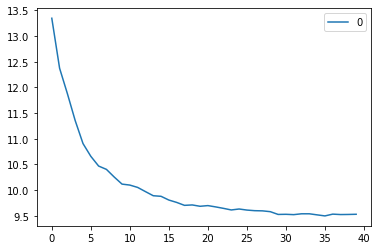

In [27]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

Classification model for classifying if team will return

In [28]:
X = df[df.columns[0:-1]]
y = df[['result_Return']]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# printTestTrain(X_train, X_test, y_train, y_test)

In [29]:
df

,snap_<,snap_>,snap_H,snap_L,snap_OK,kicktype_A,kicktype_N,kicktype_R,quarter_1,quarter_2,...,P22_t25_o,P22_t25_dir,P22_t30_x,P22_t30_y,P22_t30_s,P22_t30_a,P22_t30_dis,P22_t30_o,P22_t30_dir,result_Return
0,0,0,0,0,1,0,1,0,1,0,...,234.56,239.04,13.87,32.05,1.26,5.02,0.16,232.79,208.81,1
1,0,0,0,0,1,0,1,0,1,0,...,261.29,298.83,41.28,32.59,3.61,2.63,0.37,271.19,321.46,0
2,0,0,0,0,1,0,1,0,0,1,...,137.01,261.71,14.11,27.14,3.19,2.72,0.32,142.72,244.21,0
3,0,0,0,0,1,0,1,0,0,1,...,81.98,71.33,83.63,30.32,1.51,1.80,0.16,63.54,75.25,0
4,0,0,0,0,1,0,1,0,0,1,...,87.27,165.12,33.93,20.29,2.85,3.29,0.27,91.30,109.31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5361,0,0,1,0,0,0,1,0,0,1,...,239.92,264.21,81.01,42.26,8.02,2.08,0.80,230.31,255.97,1
5362,0,0,0,0,1,0,1,0,0,1,...,196.28,153.07,36.96,40.09,7.03,2.89,0.69,153.27,143.08,1
5363,0,0,0,0,1,0,1,0,0,0,...,184.74,159.87,39.97,37.73,7.70,2.22,0.76,161.90,150.72,1
5364,0,0,0,0,1,0,1,0,0,0,...,198.05,152.45,39.46,39.41,6.62,1.73,0.65,176.24,146.87,1


In [30]:
df['kickReturnYardage'].mean()

KeyError: 'kickReturnYardage'

In [ ]:
for size in range(50,160,10): 
    print("Size: ", size)
    calculation(RandomForestClassifier(n_estimators=size,random_state = 1),X_train_scaled,y_train.values.ravel(),X_test_scaled,y_test)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y.values.ravel())
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()